In [5]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pprint

In [6]:
with rasterio.open('./ghw2018_snowmelt_data/scene_30m_mask.tif') as raster:
   mask = raster.read(1)

In [7]:
dates_in_2014 = ["0323", "0407", "0413", "0420", "0428", "0502", "0511", "0517", "0527", "0531", "0605"]
data_matrices = []

for date in dates_in_2014:
   with rasterio.open(f"./ghw2018_snowmelt_data/TB2014{date}_SUPERsnow_depth.tif_mean30m.tif") as raster:
       data_matrices.append(raster.read(1)*mask)

In [21]:
# Replacing Nan with 0 throughout
data_matrices=np.nan_to_num(data_matrices)

#data_matrices = np.asarray(data_matrices)
#ata_matrices = data_matrices[~np.isnan(data_matrices)]

diffs = np.diff(data_matrices, axis=0)
diffs[abs(diffs) < 0.001] = np.nan

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

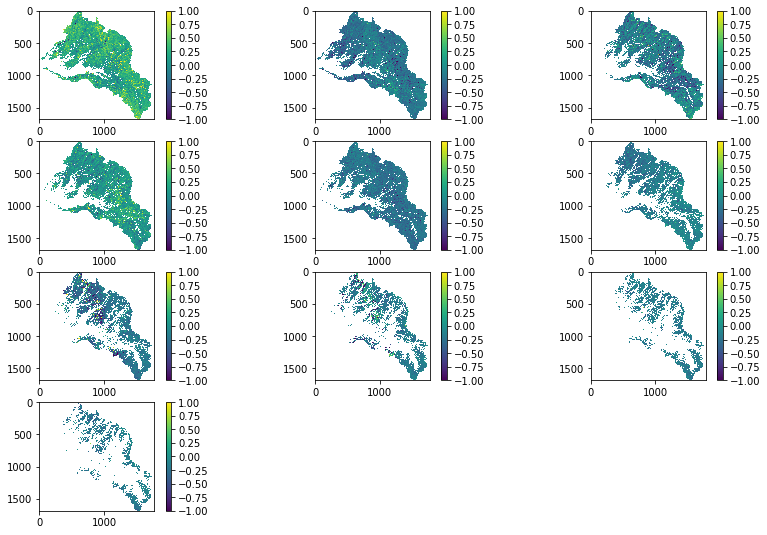

In [33]:
plt.figure(figsize=(14,14))
plot_number=1
for matrix in diffs:
   ax = plt.subplot(6,3, plot_number)
   plt.imshow(matrix, vmin = -1, vmax = 1)
   plot_number = plot_number + 1
   plt.colorbar()

plt.tight_layout

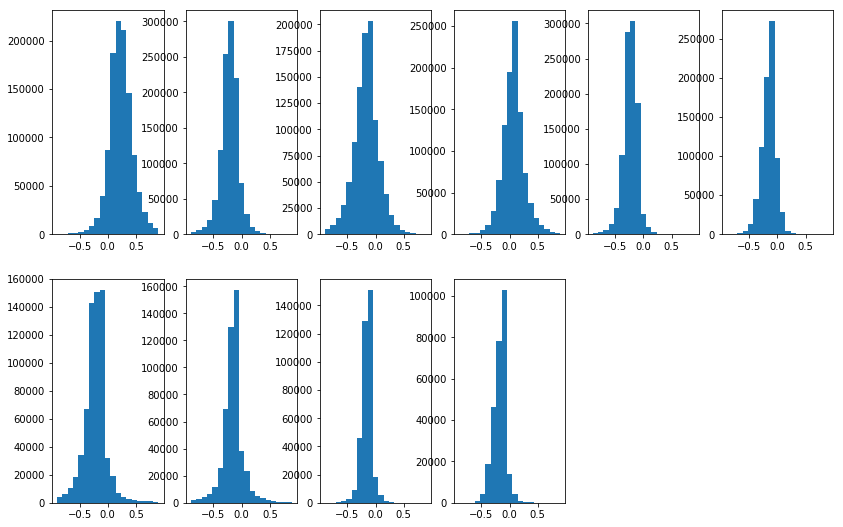

In [39]:
# Plot a histagram distribution of the differences between succcessive dates. This requires bins

plt.figure(figsize=(14,14))
plot_number=1
for matrix in diffs:
    ax = plt.subplot(3,6, plot_number)
    matrix = matrix[~np.isnan(matrix)] #~ means opposite (a la ! in R)
    matrix = matrix.ravel() # ravel flattens: turns 2D matrix into a vector (or something like that)
    bins = np.linspace(-0.9, 0.9, 20)
    plt.hist(matrix, bins = bins)
    plot_number = plot_number + 1
    
# plt.tight_layout

C:\Users\clittlef\AppData\Local\Continuum\anaconda3\envs\ghw2018_snowmelt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


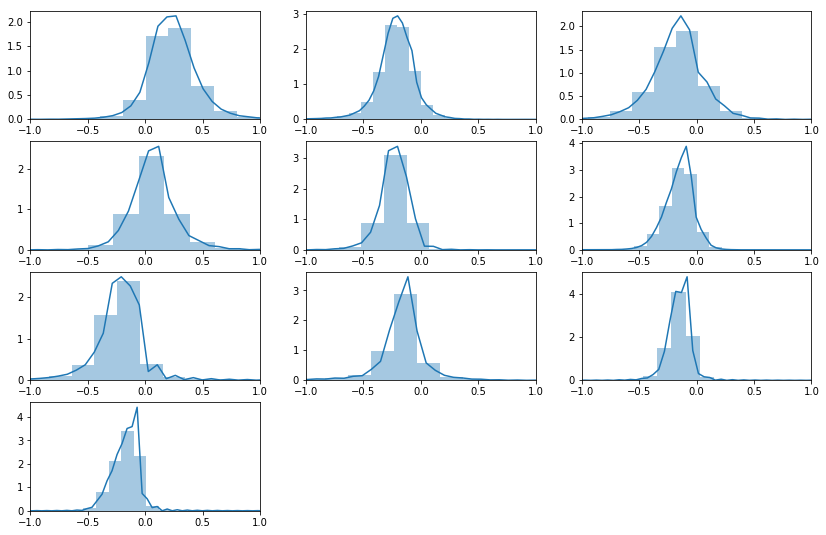

In [45]:
# Alterantive way to plot historgram, without needing to bin. But can add bins if you want to

import seaborn as sns

plt.figure(figsize=(14,14))
plot_number = 1
for matrix in diffs:
    ax = plt.subplot(6,3, plot_number)
    matrix = matrix[~np.isnan(matrix)]
    matrix = matrix.ravel()
    sns.distplot(matrix)
    #sns.distplot(matrix, bins = np.linspace(-0.9, 0.9, 20))
    plt.xlim((-1,1))
    plot_number = plot_number + 1

In [42]:
sns.distplot?